# This file is used to evaluate the MobileNetV2 model performance on different tornado types.

## 1. Load data and build sub test sets

In [17]:
# Load saved model
model_file = 'mobilenet_model.keras'
mobilenet_model = keras.models.load_model(model_file,compile=False)

import os
import pandas as pd

# Build a test set
ds_test = get_dataloader("keras", DATA_ROOT, [2021], "test", 128, {}, select_keys=ALL_VARIABLES + ['range_folded_mask', 'coordinates'])

evalate_model(mobilenet_model, ds_test)

def get_subset_test_data(years, category):
    # Set the root directory for the dataset
    os.environ['TORNET_ROOT'] = '../dataset'
    data_root = os.environ['TORNET_ROOT']

    # Load the catalog
    catalog_path = os.path.join(data_root, 'catalog.csv')
    if not os.path.exists(catalog_path):
        raise RuntimeError('Unable to find catalog.csv at ' + data_root)

    catalog = pd.read_csv(catalog_path, parse_dates=['start_time', 'end_time'])

    # Filter the catalog based on the provided years and category
    catalog = catalog[(catalog.start_time.dt.year.isin(years)) & (catalog['category'].isin(category))]

    # Initialize the DataLoader
    ds_test = get_dataloader("keras", DATA_ROOT, [2021], "test", 64, {}, select_keys=ALL_VARIABLES + ['range_folded_mask', 'coordinates'], catalog=catalog)

    return ds_test

categories = [['TOR', 'NUL', 'WRN'], ['TOR', 'NUL'], ['TOR', 'WRN']]
years = [2021]
for category in categories:
    print('Evaluation for category:', category)
    ds_test = get_subset_test_data(years, category)
    evalate_model(mobilenet_model, ds_test)
    print('---------------------------------------------------------')

34/34 ━━━━━━━━━━━━━━━━━━━━ 291s 8s/step - AUC: 0.6642 - AUCPR: 0.0794 - BinaryAccuracy: 0.8531 - F1: 0.1293 - FalseNegatives: 65.5429 - FalsePositives: 278.1714 - Precision: 0.0841 - Recall: 0.2820 - TrueNegatives: 1927.1143 - TruePositives: 24.7143 - loss: 0.0072


INFO:root:{'AUC': 0.6388490200042725, 'AUCPR': 0.06596256792545319, 'BinaryAccuracy': 0.8437207341194153, 'TruePositives': 44.0, 'FalsePositives': 538.0, 'TrueNegatives': 3557.0, 'FalseNegatives': 129.0, 'Precision': 0.07560137659311295, 'Recall': 0.2543352544307709, 'F1': 0.11655626446008682}


Evaluation for category: ['TOR', 'NUL', 'WRN']
67/67 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - AUC: 0.6647 - AUCPR: 0.0786 - BinaryAccuracy: 0.8534 - F1: 0.1300 - FalseNegatives: 62.8235 - FalsePositives: 266.4706 - Precision: 0.0846 - Recall: 0.2840 - TrueNegatives: 1853.3529 - TruePositives: 23.8235 - loss: 0.0072


INFO:root:{'AUC': 0.6388490200042725, 'AUCPR': 0.06596256792545319, 'BinaryAccuracy': 0.8437207341194153, 'TruePositives': 44.0, 'FalsePositives': 538.0, 'TrueNegatives': 3557.0, 'FalseNegatives': 129.0, 'Precision': 0.07560137659311295, 'Recall': 0.2543352544307709, 'F1': 0.11655626446008682}


---------------------------------------------------------
Evaluation for category: ['TOR', 'NUL']
40/40 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - AUC: 0.7554 - AUCPR: 0.2316 - BinaryAccuracy: 0.8877 - F1: 0.2557 - FalseNegatives: 65.7073 - FalsePositives: 81.8049 - Precision: 0.2357 - Recall: 0.2843 - TrueNegatives: 1168.8292 - TruePositives: 24.3415 - loss: 0.0072


INFO:root:{'AUC': 0.7261059284210205, 'AUCPR': 0.16913804411888123, 'BinaryAccuracy': 0.8854991793632507, 'TruePositives': 44.0, 'FalsePositives': 160.0, 'TrueNegatives': 2191.0, 'FalseNegatives': 129.0, 'Precision': 0.21568627655506134, 'Recall': 0.2543352544307709, 'F1': 0.2334216982126236}


---------------------------------------------------------
Evaluation for category: ['TOR', 'WRN']
30/30 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - AUC: 0.4489 - AUCPR: 0.0849 - BinaryAccuracy: 0.7289 - F1: 0.1077 - FalseNegatives: 73.2258 - FalsePositives: 199.0323 - Precision: 0.0770 - Recall: 0.1790 - TrueNegatives: 728.7419 - TruePositives: 20.7419 - loss: 0.0072


INFO:root:{'AUC': 0.5212222337722778, 'AUCPR': 0.09981919825077057, 'BinaryAccuracy': 0.7355242371559143, 'TruePositives': 44.0, 'FalsePositives': 378.0, 'TrueNegatives': 1366.0, 'FalseNegatives': 129.0, 'Precision': 0.10426539927721024, 'Recall': 0.2543352544307709, 'F1': 0.14789912104606628}


---------------------------------------------------------


## 2. Plot charts for analysis

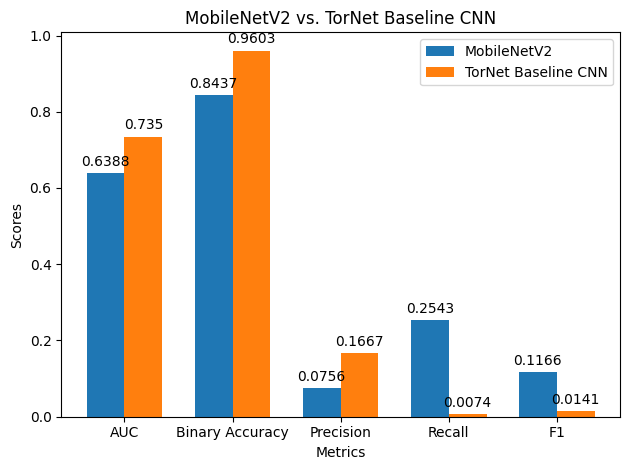

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['AUC', 'Binary Accuracy', 'Precision', 'Recall', 'F1']
mobilenet_scores = [0.6388, 0.8437, 0.0756, 0.2543, 0.1166]
tor_net_scores = [0.7350, 0.9603, 0.1667, 0.0074, 0.0141]

# Set positions of the bars on the x-axis
x = np.arange(len(metrics))

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots()

# Create bars for MobileNet and TorNet Baseline CNN
bars1 = ax.bar(x - width/2, mobilenet_scores, width, label='MobileNetV2')
bars2 = ax.bar(x + width/2, tor_net_scores, width, label='TorNet Baseline CNN')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('MobileNetV2 vs. TorNet Baseline CNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar, displaying its height
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()

# Show plot
plt.show()

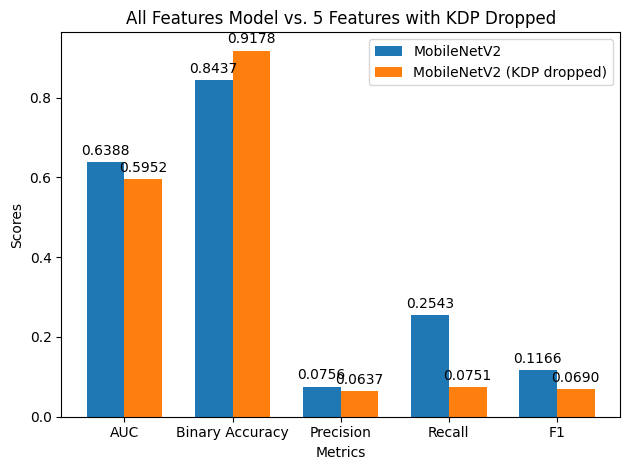

In [10]:
# Data for the chart
metrics = ['AUC', 'Binary Accuracy', 'Precision', 'Recall', 'F1']
mobilenet_all_features = [0.6388, 0.8437, 0.0756, 0.2543, 0.1166]
mobilenet_kdp_dropped = [0.5952, 0.9178, 0.0637, 0.0751, 0.0690]

# X-axis positions for the metrics
x = np.arange(len(metrics))

# Width of the bars
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, mobilenet_all_features, width, label='MobileNetV2')
bars2 = ax.bar(x + width/2, mobilenet_kdp_dropped, width, label='MobileNetV2 (KDP dropped)')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('All Features Model vs. 5 Features with KDP Dropped')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)

# Adjust layout to fit all elements
fig.tight_layout()

# Display the plot
plt.show()


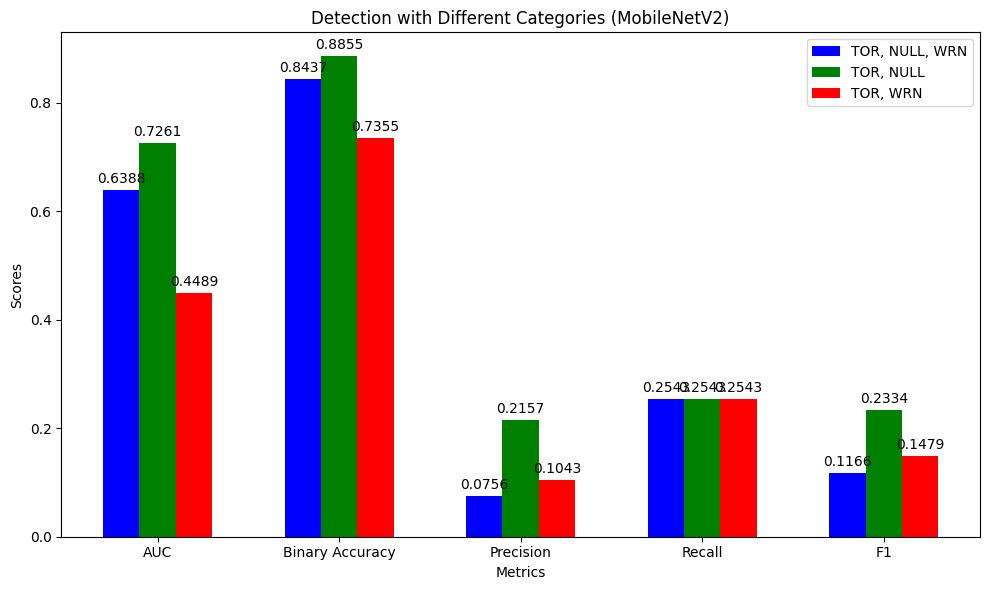

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
metrics = ['AUC', 'Binary Accuracy', 'Precision', 'Recall', 'F1']
tor_null_wrn_scores = [0.6388, 0.8437, 0.0756, 0.2543, 0.1166]
tor_null_scores = [0.7261, 0.8855, 0.2157, 0.2543, 0.2334]
tor_wrn_scores = [0.4489, 0.7355, 0.1043, 0.2543, 0.1479]

# X-axis positions for the metrics
x = np.arange(len(metrics))

# Width of the bars
width = 0.2

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each category with different colors
bars1 = ax.bar(x - width, tor_null_wrn_scores, width, label='TOR, NULL, WRN', color='b')
bars2 = ax.bar(x, tor_null_scores, width, label='TOR, NULL', color='g')
bars3 = ax.bar(x + width, tor_wrn_scores, width, label='TOR, WRN', color='r')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Detection with Different Categories (MobileNetV2)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Adjust layout to fit all elements
fig.tight_layout()

# Display the plot
plt.show()
